# 서울시 구별 CCTV 현황 분석하기

- 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
- Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
- Pandas와 Matplotlib의 기본적 사용법을 확인
- 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

In [29]:
import pandas as pd

In [30]:
CCTV_Seoul = pd.read_csv('data/01.CCTV_in_Seoul.csv',  encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [33]:
# 열이름들 확인
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [34]:
CCTV_Seoul.columns[0]

'기관명'

In [35]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


## 2-2. 엑셀파일 읽기 - 서울시 인구현황

In [36]:
# 그냥 read_excel로 읽으면 이상하다. 위에서 세줄이 열의 제목이기 떄문. 세번째 행부터 읽어야 함.
# 옵션 : header, usecols 사용
pop_Seoul = pd.read_excel('data/01.population_in_Seoul.xls',  
                          header=2,
                          usecols='B,D,G,J,N',                          
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [37]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 3. Pandas 기초

In [38]:
import pandas as pd
import numpy as np

In [39]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

# 4. CCTV 데이터 파악하기

In [40]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [43]:
CCTV_Seoul.sort_values(by="소계", ascending=[True]).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [44]:
CCTV_Seoul.sort_values(by="소계", ascending=[False]).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [46]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100

In [47]:
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 5. 서울시 인구 데이터 파악하기

In [49]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [52]:
# drop : 행 삭제
pop_Seoul.drop([0], inplace=True)

In [53]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [54]:
# unique 열 확인
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [55]:
pop_Seoul.isnull().sum()

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [61]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [62]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [63]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [67]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [68]:
# 인구수 많은 순서 
pop_Seoul.sort_values(by='인구수', ascending=[False]).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [69]:
# 외국인수 많은 순서
pop_Seoul.sort_values(by='외국인', ascending=[False]).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [70]:
# 고령자 많은 순서
pop_Seoul.sort_values(by='고령자', ascending=[False]).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [71]:
# 고령자 비율 높은 순서
pop_Seoul.sort_values(by='고령자비율', ascending=[False]).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [74]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


# 6. Pandas 고급 - 두 DataFrame 병합하기

# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [72]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [75]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [76]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 변수간 상관관계
- 0 ~ 0.1 : 무시
- 0.1 ~ 0.3 : 약한
- 0.3 ~ 0.7 : 뚜렷
- 0.7 ~ 1.0 : 강한

In [80]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.25866272],
       [-0.25866272,  1.        ]])

In [81]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

In [82]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

# 8. 그래프 그리기 기초 - matplotlib

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

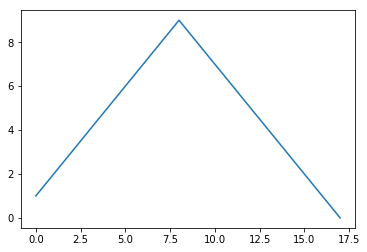

In [84]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [85]:
import numpy as np
t = np.arange(0,12,0.01)
y = np.sin(t)

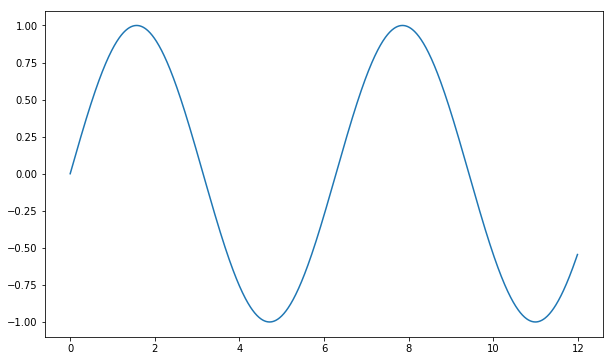

In [86]:
plt.figure(figsize=(10,6)) 
plt.plot(t, y)
plt.show()

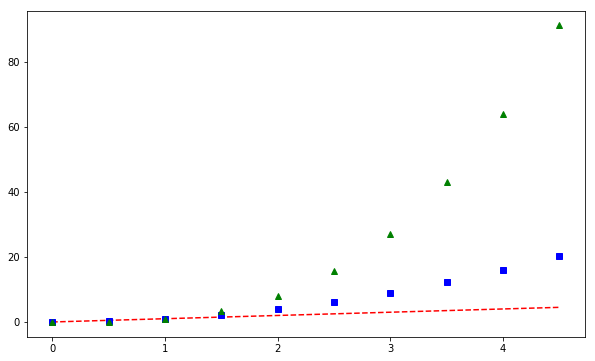

In [87]:
t = np.arange(0, 5, 0.5)  # 0에서 5까지 0.5 간격 : 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

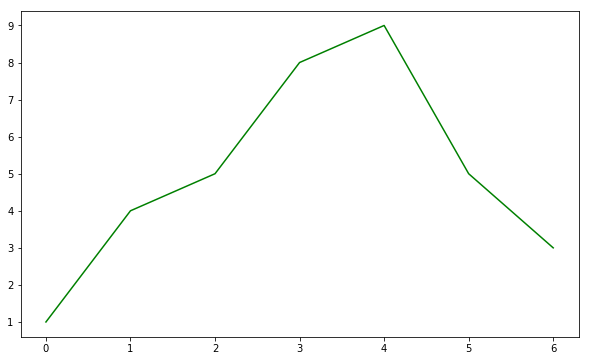

In [88]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

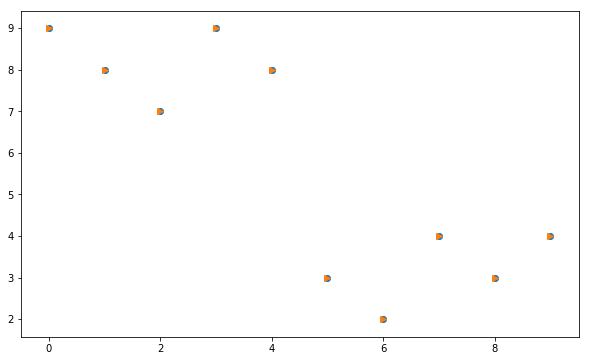

In [92]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.scatter(t,y, marker='>')
plt.show()

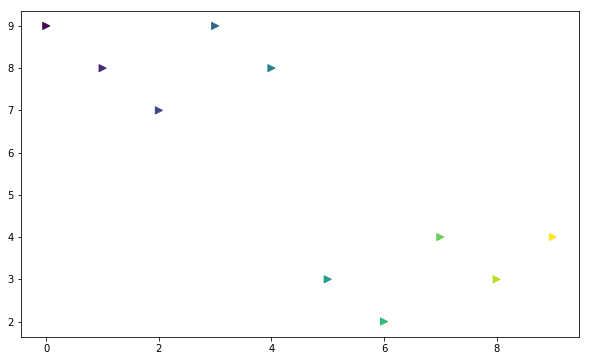

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(t, y, s = 50, c = t, marker='>')
plt.show()

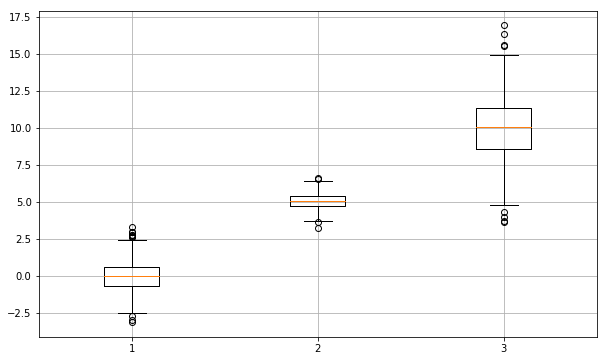

In [96]:
DATA1 = np.random.normal(loc=0, scale=1, size=1000)
DATA2 = np.random.normal(loc=5, scale=0.5, size=1000)
DATA3 = np.random.normal(loc=10, scale=2, size=1000)

plt.figure(figsize=(10,6))
plt.boxplot((DATA1, DATA2, DATA3))
plt.grid()
plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import numpy as np
import matplotlib.font_manager as fm  # 그래프에서 폰트 깨지는것 대처
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import warnings  # 워닝 없애주는 것.
warnings.filterwarnings('ignore')

In [100]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


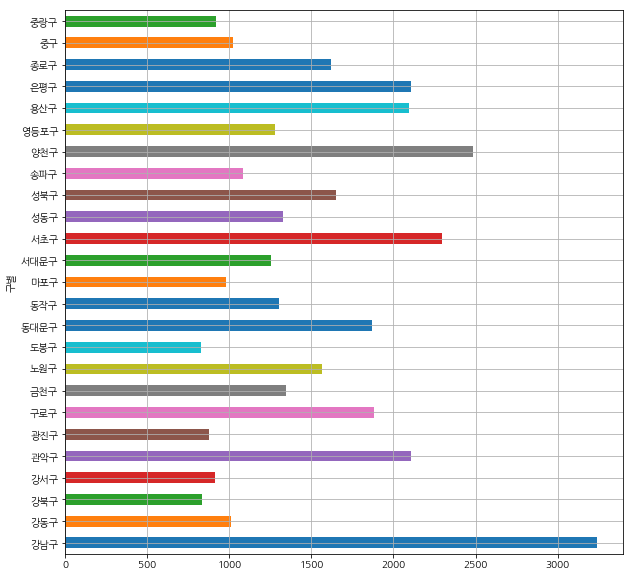

In [101]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

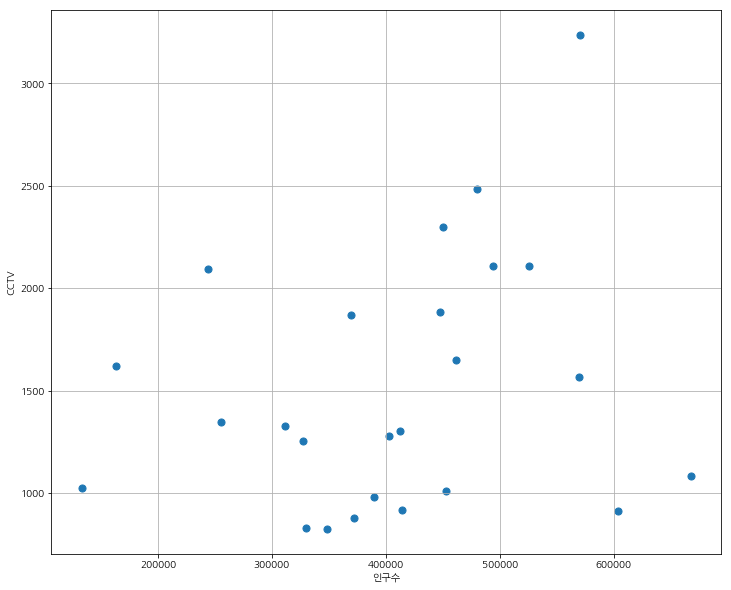

In [103]:
plt.figure(figsize=(12,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [104]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.15151285e-03, 1.04561312e+03])

In [105]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

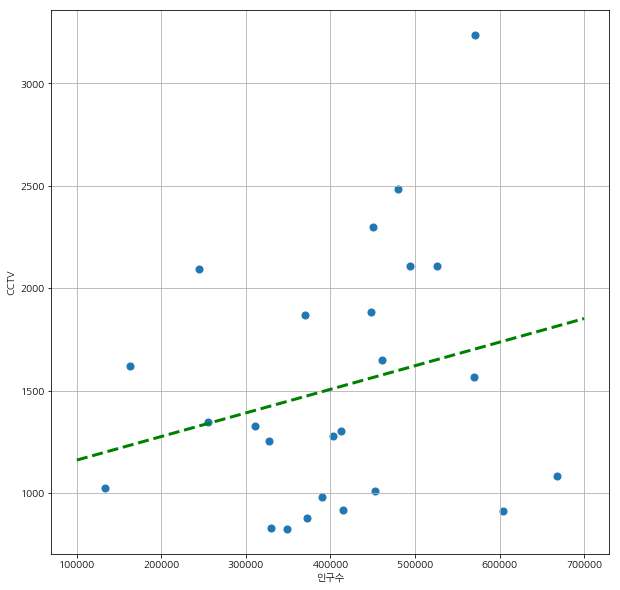

In [106]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 10. 조금 더 설득력 있는 자료 만들기

In [108]:
# 최소제곱법과 polynomial class : Numpy의 polyfit과 poly1d (https://pinkwink.kr/1127)
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1535.448801
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,883.686047
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,829.864334
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,769.183989
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,733.228369


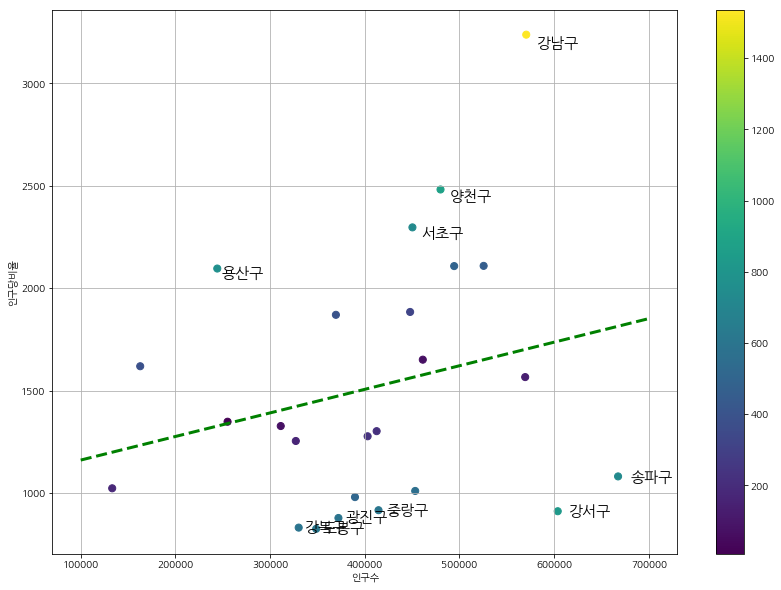

In [109]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()